# Aula 1 - Problema e ferramenta

## Aula 1.1 Apresentação

## Aula 1.2 Entendendo o problema


* https://spark.apache.org/docs/latest/api/python/index.html 
* https://spark.apache.org/docs/latest/ml-guide.html

## Aula 1.3 Dicionário dos dados

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features

* `Acousticness/Acústica:` Variável numérica, medida de confiança de 0,0 a 1,0 se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica.

* `Danceability/Dançabilidade:` Variável numérica, a dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é o menos dançável e 1,0 é o mais dançável.

* `Duration_ms:`Variável numérica, a duração da trilha em milissegundos.

* `Duration_min:` Variável numérica, a duração da faixa em minutos.

* `Energy/Energia:` Variável numérica, Energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, o death metal tem alta energia, enquanto um prelúdio de Bach tem uma pontuação baixa na escala. As características perceptivas que contribuem para este atributo incluem faixa dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.

* `Explicit/Explícito:` Variável categórica, se a faixa tem ou não letras explícitas (verdadeiro = sim (1); falso = não(0), não OU desconhecido).

* `Id:` O ID do Spotify para a faixa.

* `Instrumentalness/Instrumentalidade:` Variável numérica, prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou de palavras faladas são claramente “vocais”. Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

* `Key/Chave:`Variável numérica, a chave geral estimada da faixa. Os inteiros são mapeados para pitchs usando a notação padrão de Pitch Class. Por exemplo. 0 = C, 1 = C#/Db, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1.

* `Liveness/ Ao vivo:` Variável numérica, detecta a presença de um público na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.

* `Loudness/ Volume em dB:` Variável numérica, volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. A sonoridade é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores típicos variam entre -60 e 0 db.

* `Mode/ Modo:` Variável numérica, o modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0.

* `Popularity/Popularidade:` Variável numérica, a popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de execuções que a faixa teve e quão recentes são essas execuções.

* `Speechiness/Fala:` Variável numérica, a fala detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música rap. Os valores abaixo de 0,33 provavelmente representam músicas e outras faixas que não são de fala.

* `Tempo:` Variável numérica, Tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.

* `Valence/Valência:` Variável numérica, Medida de 0,0 a 1,0 descrevendo a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimida, irritada).

* `Year/Ano:` Ano em que a música foi lançada.

<h1>Instalando o PySpark

In [103]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/home/dgamorim/development/spark/src/exec/spark-3.5.0-bin-hadoop3"

In [104]:
import findspark
findspark.init()

Importando a Classe SparkSession que é por onde vamos interagir com o Spark

In [105]:
from pyspark.sql import SparkSession

Criando a sessão Spark, aqui podemos verificar a versão que estamos utilizando e o nome da nossa App Spark

In [106]:
sessao_spark = SparkSession.builder\
                           .appName("Recomendador PySpark")\
                           .getOrCreate()
sessao_spark

# Aula 2 - Leitura e análise dos dados

## Aula 2.1 Leitura dos dados

In [107]:
from pyspark import SparkFiles

In [108]:
url_dados = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas.csv?raw=true'
sessao_spark.sparkContext.addFile(url_dados)
path_dados_file = 'file://' + SparkFiles.get('dados_musicas.csv')

23/10/10 11:10:01 WARN SparkContext: The path https://github.com/IgorNascAlves/dados/blob/main/dados_musicas.csv?raw=true has been added already. Overwriting of added paths is not supported in the current version.


In [109]:
dados = sessao_spark.read.csv(path_dados_file, header=True, sep=';', inferSchema=True)

In [110]:
dados.show()

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|           valence|year|acousticness|       artists|      danceability|duration_ms|            energy|explicit|                  id|    instrumentalness|key|liveness|           loudness|mode|                name|popularity|speechiness|             tempo|        artists_song|
+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|             0.285|2000|     0.00239|      Coldplay|             0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|             1.21E-4| 11|   0.234|  

In [111]:
dados.printSchema()

root
 |-- valence: double (nullable = true)
 |-- year: integer (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- artists: string (nullable = true)
 |-- danceability: double (nullable = true)
 |-- duration_ms: integer (nullable = true)
 |-- energy: double (nullable = true)
 |-- explicit: integer (nullable = true)
 |-- id: string (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- key: integer (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- artists_song: string (nullable = true)



In [112]:
dados.count()

20311

In [113]:
len(dados.columns)

19

In [114]:
import pyspark.sql.functions as f

In [115]:
dados.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in dados.columns]).show()

+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|valence|year|acousticness|artists|danceability|duration_ms|energy|explicit| id|instrumentalness|key|liveness|loudness|mode|name|popularity|speechiness|tempo|artists_song|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|      0|   0|           0|      0|           0|          0|     0|       0|  0|               0|  0|       0|       0|   0|   0|         0|          0|    0|           0|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+



In [116]:
print(sorted(dados.select('year').distinct().collect()))

[Row(year=2000), Row(year=2001), Row(year=2002), Row(year=2003), Row(year=2004), Row(year=2005), Row(year=2006), Row(year=2007), Row(year=2008), Row(year=2009), Row(year=2010), Row(year=2011), Row(year=2012), Row(year=2013), Row(year=2014), Row(year=2015), Row(year=2016), Row(year=2017), Row(year=2018), Row(year=2019), Row(year=2020)]


## Aula 2.2 - Análise dos dados

In [117]:
url_anos_dados = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas_ano.csv?raw=true'

sessao_spark.sparkContext.addFile(url_anos_dados)
path_dados_file = 'file://' + SparkFiles.get('dados_musicas_ano.csv')

dados_anos = sessao_spark.read.csv(path_dados_file, header=True, inferSchema=True)

23/10/10 11:10:03 WARN SparkContext: The path https://github.com/IgorNascAlves/dados/blob/main/dados_musicas_ano.csv?raw=true has been added already. Overwriting of added paths is not supported in the current version.


In [118]:
dados_anos.show()

+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|mode|year|      acousticness|       danceability|       duration_ms|             energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|            valence|         popularity|key|
+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|   1|1921|0.8868960000000005| 0.4185973333333336|260537.16666666663|0.23181513333333334|0.34487805886666656|            0.20571| -17.04866666666665|           0.073662|101.53149333333329|0.37932666666666665| 0.6533333333333333|  2|
|   1|1922|0.9385915492957748| 0.4820422535211267|165469.74647887325

In [119]:
dados_anos = dados_anos.filter('year >= 2000')
dados_anos.show()

+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+---+
|mode|year|       acousticness|      danceability|       duration_ms|            energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|           valence|        popularity|key|
+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+---+
|   1|2000|0.28932270051635994| 0.590918047034764| 242724.6426380368|0.6254128323108387|0.10116776879345596| 0.1976860429447853| -8.247765848670758|0.08920541922290394| 118.9993231083843|0.5594754601226991|  46.6840490797546|  7|
|   1|2001| 0.2868424748428934|0.5833178553615969|240307.79600997505|0.626985522

In [120]:
dados_anos.count()

21

In [121]:
len(dados_anos.columns)

14

[Documentação do ToPandas](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.toPandas.html)

ToPandas vai pegar todos os dados e trazer para um nó 

In [ ]:
import plotly.express as px

fig = px.line(dados_anos.toPandas(), x='year', y='loudness', markers=True, title='Variação do loudness conforme os anos')
fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

temp = dados_anos.toPandas()

fig.add_trace(go.Scatter(x=temp['year'], y=temp['acousticness'], name='Acousticness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['valence'],
                    name='Valence'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['danceability'],
                    name='Danceability'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['energy'],
                    name='Energy'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['instrumentalness'],
                    name='Instrumentalness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['liveness'],
                    name='Liveness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['speechiness'],
                    name='Speechiness'))

fig.show()

## Aula 2.3 Matriz de correlação

In [ ]:
fig = px.imshow(dados_anos.drop('mode').toPandas().corr(), text_auto=True)
fig.show()

# Aula 3 - Clusterização por gênero

## Aula 3.1 PCA e StandartScaler

In [ ]:
url_dados_generos = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas_genero.csv?raw=true'

sessao_spark.sparkContext.addFile(url_dados_generos)
path_dados_file = "file://" + SparkFiles.get("dados_musicas_genero.csv")

dados_generos = sessao_spark.read.csv(path_dados_file, header=True, inferSchema= True)

In [ ]:
dados_generos.show()

+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|        popularity|key|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|   1|21st century clas...| 0.9793333333333332|0.16288333333333335|160297.66666666663|0.07131666666666665|          0.60683367|             0.3616|-31.514333333333337| 0.04056666666666667|           75.3365|0.10378333333333334| 27.83333333333333| 

In [ ]:
dados_generos.count()

2973

In [ ]:
dados_generos.select('genres').distinct().count()

2973

In [ ]:
len(dados_generos.columns)

14

In [ ]:
from pyspark.ml.feature import VectorAssembler

In [ ]:
dados_generos.columns

['mode',
 'genres',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'key']

In [ ]:
X = dados_generos.columns
X.remove('genres')
X

['mode',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'key']

In [ ]:
dados_generos_vector = VectorAssembler(inputCols=X, outputCol='features').transform(dados_generos).select(['features', 'genres'])

In [ ]:
dados_generos_vector.show(truncate=False, n=5)

23/10/10 10:45:54 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|features                                                                                                                                                                                                                   |genres                |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|[1.0,0.9793333333333332,0.16288333333333335,160297.66666666663,0.07131666666666665,0.60683367,0.3616,-31.514333333333337,0.04056666666666667,75.3365,0.10378333333333334,27.83333333333333,6.0]                            |21st century classical|
|[1.0,0.49478,0.2993

In [ ]:
from pyspark.ml.feature import StandardScaler

In [ ]:
scaler = StandardScaler(inputCol='features', outputCol='scaled_features')
scaler_model = scaler.fit(dados_generos_vector)
dados_generos_scaler = scaler_model.transform(dados_generos_vector)

In [ ]:
dados_generos_scaler.show()

+--------------------+--------------------+--------------------+
|            features|              genres|     scaled_features|
+--------------------+--------------------+--------------------+
|[1.0,0.9793333333...|21st century clas...|[2.68174831000279...|
|[1.0,0.49478,0.29...|               432hz|[2.68174831000279...|
|[1.0,0.762,0.7120...|               8-bit|[2.68174831000279...|
|[1.0,0.6514170195...|                  []|[2.68174831000279...|
|[1.0,0.6765573049...|          a cappella|[2.68174831000279...|
|[1.0,0.45921,0.51...|            abstract|[2.68174831000279...|
|[1.0,0.3421466666...|      abstract beats|[2.68174831000279...|
|[1.0,0.2438540633...|    abstract hip hop|[2.68174831000279...|
|[0.0,0.3229999999...|           accordeon|[0.0,1.0101313736...|
|[1.0,0.446125,0.6...|           accordion|[2.68174831000279...|
|[0.0,0.0679505384...|          acid house|[0.0,0.2125045534...|
|[1.0,0.2569145079...|           acid rock|[2.68174831000279...|
|[1.0,0.00683,0.66...|   

## Aula 3.2 PCA

In [ ]:
from pyspark.ml.feature import PCA

In [ ]:
pca = PCA(k=2, inputCol='scaled_features', outputCol='pca_features')
model_pca = pca.fit(dados_generos_scaler)
dados_generos_pca = model_pca.transform(dados_generos_scaler)

23/10/10 10:45:57 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/10/10 10:45:57 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


In [ ]:
dados_generos_pca.select('pca_features').show(truncate=False)

+-----------------------------------------+
|pca_features                             |
+-----------------------------------------+
|[2.507095366888567,0.4381691373769795]   |
|[-0.5969679056633482,4.981612052751348]  |
|[-4.158460276223561,-0.836652508107994]  |
|[-2.387344878512217,-0.4877989015663402] |
|[-2.6501218371679087,-0.5756819768820469]|
|[-1.4965091203367626,1.8644183183717793] |
|[-3.9235207721573238,0.2851835002352837] |
|[-4.611011109831115,-0.6783790472312371] |
|[-2.8376900630842297,-0.5712993716580516]|
|[-2.706690139892783,-1.2593788079708297] |
|[-4.698331383924287,1.2765569680619446]  |
|[-3.3759874966798677,0.7560741064307468] |
|[-5.608998877066022,1.0427311644393218]  |
|[0.2954946352117687,-0.2763864586236307] |
|[-2.5725591062870423,-1.3169815431109795]|
|[-3.4008228020493454,0.5073029625781903] |
|[-4.366720316263419,-0.336482705977109]  |
|[-2.7254698167724003,0.5058604987046363] |
|[-4.958112358381605,1.2627579957290729]  |
|[-3.693495184642272,1.382276206

In [ ]:
from pyspark.ml import Pipeline

In [ ]:
pca_pipeline = Pipeline(stages=[VectorAssembler(inputCols=X, outputCol='features'),
                                StandardScaler(inputCol='features', outputCol='scaled_features'),
                                PCA(k=2, inputCol='scaled_features', outputCol='pca_features')])

In [ ]:
pca_pipeline_model = pca_pipeline.fit(dados_generos)

In [ ]:
dados_generos_pca = pca_pipeline_model.transform(dados_generos)

In [ ]:
dados_generos_pca.show()

+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+--------------------+--------------------+--------------------+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|        popularity|key|            features|     scaled_features|        pca_features|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+--------------------+--------------------+--------------------+
|   1|21st century clas...| 0.9793333333333332|0.162883333

In [ ]:
dados_generos_pca.select('pca_features').show(truncate=False)

+-----------------------------------------+
|pca_features                             |
+-----------------------------------------+
|[2.507095366888567,0.4381691373769795]   |
|[-0.5969679056633482,4.981612052751348]  |
|[-4.158460276223561,-0.836652508107994]  |
|[-2.387344878512217,-0.4877989015663402] |
|[-2.6501218371679087,-0.5756819768820469]|
|[-1.4965091203367626,1.8644183183717793] |
|[-3.9235207721573238,0.2851835002352837] |
|[-4.611011109831115,-0.6783790472312371] |
|[-2.8376900630842297,-0.5712993716580516]|
|[-2.706690139892783,-1.2593788079708297] |
|[-4.698331383924287,1.2765569680619446]  |
|[-3.3759874966798677,0.7560741064307468] |
|[-5.608998877066022,1.0427311644393218]  |
|[0.2954946352117687,-0.2763864586236307] |
|[-2.5725591062870423,-1.3169815431109795]|
|[-3.4008228020493454,0.5073029625781903] |
|[-4.366720316263419,-0.336482705977109]  |
|[-2.7254698167724003,0.5058604987046363] |
|[-4.958112358381605,1.2627579957290729]  |
|[-3.693495184642272,1.382276206

## Aula 3.3 K-Means

https://user.ceng.metu.edu.tr/~akifakkus/courses/ceng574/k-means/

In [ ]:
from pyspark.ml.clustering import KMeans

In [ ]:
SEED = 1224

In [ ]:
kmeans = KMeans(featuresCol='pca_features', predictionCol='cluster_pca').setK(5).setSeed(SEED)

In [ ]:
model_kmeans = kmeans.fit(dados_generos_pca)

In [ ]:
prections_kmeans = model_kmeans.transform(dados_generos_pca)

In [ ]:
prections_kmeans.select('pca_features', 'cluster_pca').show(truncate=False)

+-----------------------------------------+-----------+
|pca_features                             |cluster_pca|
+-----------------------------------------+-----------+
|[2.507095366888567,0.4381691373769795]   |2          |
|[-0.5969679056633482,4.981612052751348]  |2          |
|[-4.158460276223561,-0.836652508107994]  |4          |
|[-2.387344878512217,-0.4877989015663402] |0          |
|[-2.6501218371679087,-0.5756819768820469]|0          |
|[-1.4965091203367626,1.8644183183717793] |2          |
|[-3.9235207721573238,0.2851835002352837] |4          |
|[-4.611011109831115,-0.6783790472312371] |1          |
|[-2.8376900630842297,-0.5712993716580516]|4          |
|[-2.706690139892783,-1.2593788079708297] |0          |
|[-4.698331383924287,1.2765569680619446]  |3          |
|[-3.3759874966798677,0.7560741064307468] |4          |
|[-5.608998877066022,1.0427311644393218]  |1          |
|[0.2954946352117687,-0.2763864586236307] |2          |
|[-2.5725591062870423,-1.3169815431109795]|0    

## Aula 3.4 Plotando a clustering

In [ ]:
from pyspark.ml.functions import vector_to_array

In [ ]:
pca_features_xy = prections_kmeans.withColumn('x', vector_to_array('pca_features')[0])\
                .withColumn('y', vector_to_array('pca_features')[1])\
                .select(['x', 'y', 'cluster_pca', 'genres'])

In [ ]:
pca_features_xy.show()

+-------------------+-------------------+-----------+--------------------+
|                  x|                  y|cluster_pca|              genres|
+-------------------+-------------------+-----------+--------------------+
|  2.507095366888567| 0.4381691373769795|          2|21st century clas...|
|-0.5969679056633482|  4.981612052751348|          2|               432hz|
| -4.158460276223561| -0.836652508107994|          4|               8-bit|
| -2.387344878512217|-0.4877989015663402|          0|                  []|
|-2.6501218371679087|-0.5756819768820469|          0|          a cappella|
|-1.4965091203367626| 1.8644183183717793|          2|            abstract|
|-3.9235207721573238| 0.2851835002352837|          4|      abstract beats|
| -4.611011109831115|-0.6783790472312371|          1|    abstract hip hop|
|-2.8376900630842297|-0.5712993716580516|          4|           accordeon|
| -2.706690139892783|-1.2593788079708297|          0|           accordion|
| -4.698331383924287| 1.2

In [ ]:
fig = px.scatter(pca_features_xy.toPandas(), x='x', y='y', color='cluster_pca', hover_data=['x', 'y', 'genres'])
fig.show()

In [ ]:
pca_pipeline_model.stages[2].explainedVariance

DenseVector([0.2975, 0.1212])

# Aula 4 - Clusterização por música

## Aula 4.1 Redução de dimensionalidade com PCA

In [ ]:
dados.show()

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|           valence|year|acousticness|       artists|      danceability|duration_ms|            energy|explicit|                  id|    instrumentalness|key|liveness|           loudness|mode|                name|popularity|speechiness|             tempo|        artists_song|
+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|             0.285|2000|     0.00239|      Coldplay|             0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|             1.21E-4| 11|   0.234|  

In [ ]:
X = dados.columns
X.remove('artists')
X.remove('id')
X.remove('name')
X.remove('artists_song')
X

['valence',
 'year',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'popularity',
 'speechiness',
 'tempo']

In [ ]:
dados_encoded_vector = VectorAssembler(inputCols=X, outputCol='features').transform(dados)

In [ ]:
dados_encoded_vector.select('features').show(truncate=False, n=5)

+-------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                 |
+-------------------------------------------------------------------------------------------------------------------------+
|[0.285,2000.0,0.00239,0.429,266773.0,0.6609999999999999,0.0,1.21E-4,11.0,0.234,-7.227,1.0,84.0,0.0281,173.372]           |
|[0.613,2000.0,0.143,0.843,270507.0,0.8059999999999999,1.0,0.0,4.0,0.0771,-5.9460000000000015,0.0,80.0,0.269,94.948]      |
|[0.4,2000.0,0.00958,0.556,216880.0,0.8640000000000001,0.0,0.0,3.0,0.209,-5.87,0.0,84.0,0.0584,105.143]                   |
|[0.5429999999999999,2000.0,0.00664,0.545,233933.0,0.865,0.0,1.1E-5,11.0,0.168,-5.7079999999999975,0.0,78.0,0.0286,99.009]|
|[0.76,2000.0,0.0302,0.949,284200.0,0.6609999999999999,1.0,0.0,5.0,0.0454,-4.244,0.0,80.0,0.0572,104.504]                 |
+-------

In [ ]:
scaler = StandardScaler(inputCol='features', outputCol='features_scaled')
model_scaler = scaler.fit(dados_encoded_vector)
dados_musicas_scaler = model_scaler.transform(dados_encoded_vector)

In [ ]:
dados_musicas_scaler.select('features_scaled').show(truncate=False, n=5)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features_scaled                                                                                                                                                                                                                                                               |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[1.156596679221045,329.8170613984441,0.008403188822334736,2.5040545743834373,3.7858811737298526,2.980511298201045,0.0,6.070790766862789E-4,3.0696424994844875,1.4832857988766257,-1.

In [ ]:
k = len(X)
k

15

In [ ]:
pca = PCA(k=k, inputCol='features_scaled', outputCol='pca_features')
model_pca = pca.fit(dados_musicas_scaler)
dados_musicas_pca = model_pca.transform(dados_musicas_scaler)

In [ ]:
sum(model_pca.explainedVariance) * 100

99.99999999999999

In [ ]:
lista_valores = [sum(model_pca.explainedVariance[0:i+1]) for i in range(k)]
lista_valores

[0.21297354127107343,
 0.34597741622955064,
 0.43989805678254446,
 0.5267820578269102,
 0.6001038103117928,
 0.6665719513652388,
 0.7282174213581727,
 0.7845103843321022,
 0.8350002357002613,
 0.8812446547406768,
 0.9151737562703046,
 0.9435370133056037,
 0.9699018569070159,
 0.9900947792885578,
 0.9999999999999999]

In [ ]:
import numpy as np

In [ ]:
k = sum(np.array(lista_valores) <= 0.7)
k

6

In [ ]:
pca = PCA(k=k, inputCol='features_scaled', outputCol='pca_features')
model_pca = pca.fit(dados_musicas_scaler)
dados_musicas_pca_final = model_pca.transform(dados_musicas_scaler)

In [ ]:
dados_musicas_pca_final.select('pca_features').show(truncate=False, n=5)

+----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                          |
+----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775703,-165.36848784906184,-11.163498729833321,-139.11374280854437,-14.152192300931375,6.254422223810392]|
|[-36.498857627749054,-167.85185045616558,-10.729023248907561,-135.904352656713,-13.388401890587229,3.972980727830861] |
|[-35.460300916940554,-165.99633344577887,-11.361290348241594,-138.24276881247,-13.866654919305782,4.342675920458719]  |
|[-35.56301325520583,-165.59515096480607,-11.46022600703138,-137.52095740570041,-15.56854280392272,4.542073725584272]  |
|[-36.54556974907567,-167.37512505802482,-11.881276527236555,-136.27798590243984,-14.056847990344538,3.583390145779156]|
+-------------------------------

In [ ]:
sum(model_pca.explainedVariance) *100

66.65719513652388

## Aula 4.2 Aplicação do cluster com K-Means

In [ ]:
pca_pipeline = Pipeline(stages=[VectorAssembler(inputCols=X, outputCol='features'),
                                StandardScaler(inputCol='features', outputCol='features_scaled'),
                                PCA(k=6, inputCol='features_scaled', outputCol='pca_features')])

In [ ]:
model_pca_pipeline = pca_pipeline.fit(dados)

In [ ]:
projection = model_pca_pipeline.transform(dados)

In [ ]:
projection.select('pca_features').show(truncate=False, n=5)

+----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                          |
+----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775703,-165.36848784906184,-11.163498729833321,-139.11374280854437,-14.152192300931375,6.254422223810392]|
|[-36.498857627749054,-167.85185045616558,-10.729023248907561,-135.904352656713,-13.388401890587229,3.972980727830861] |
|[-35.460300916940554,-165.99633344577887,-11.361290348241594,-138.24276881247,-13.866654919305782,4.342675920458719]  |
|[-35.56301325520583,-165.59515096480607,-11.46022600703138,-137.52095740570041,-15.56854280392272,4.542073725584272]  |
|[-36.54556974907567,-167.37512505802482,-11.881276527236555,-136.27798590243984,-14.056847990344538,3.583390145779156]|
+-------------------------------

In [ ]:
kmeans = KMeans(k=50, featuresCol='pca_features', predictionCol='cluster_pca', seed=SEED)

In [ ]:
modelo_kmeans = kmeans.fit(projection)

In [ ]:
projetion_kmeans = modelo_kmeans.transform(projection) 

In [ ]:
projetion_kmeans.select(['pca_features','cluster_pca']).show()

+--------------------+-----------+
|        pca_features|cluster_pca|
+--------------------+-----------+
|[-34.710044647757...|          8|
|[-36.498857627749...|          4|
|[-35.460300916940...|         35|
|[-35.563013255205...|         16|
|[-36.545569749075...|         34|
|[-36.713222290262...|         34|
|[-36.013246178822...|         34|
|[-36.542687712104...|         23|
|[-36.425249009784...|         16|
|[-35.872074915770...|         34|
|[-31.639065936568...|         44|
|[-35.661446890546...|         34|
|[-35.574542234850...|         32|
|[-36.022399748656...|         13|
|[-34.336941950985...|         35|
|[-35.096906055142...|         49|
|[-35.202423054032...|         38|
|[-34.942948671026...|         30|
|[-36.617404517517...|          4|
|[-34.296973387410...|          6|
+--------------------+-----------+
only showing top 20 rows



In [ ]:
projetion_kmeans = projetion_kmeans.withColumn('x', vector_to_array('pca_features')[0])\
                                   .withColumn('y', vector_to_array('pca_features')[1])

In [ ]:
projetion_kmeans.select(['x', 'y', 'cluster_pca', 'artists_song']).show()

+-------------------+-------------------+-----------+--------------------+
|                  x|                  y|cluster_pca|        artists_song|
+-------------------+-------------------+-----------+--------------------+
| -34.71004464775703|-165.36848784906184|          8|   Coldplay - Yellow|
|-36.498857627749054|-167.85185045616558|          4|OutKast - Ms. Jac...|
|-35.460300916940554|-165.99633344577887|         35|Linkin Park - In ...|
| -35.56301325520583|-165.59515096480607|         16|3 Doors Down - Kr...|
| -36.54556974907567|-167.37512505802482|         34|Eminem - The Real...|
| -36.71322229026232|-166.48208483099708|         34|Disturbed - Down ...|
|-36.013246178822214|-166.63514920955342|         34| Nelly - Ride Wit Me|
|  -36.5426877121049|-166.97928234833242|         23|       Eminem - Stan|
| -36.42524900978431|-165.10535006330758|         16|*NSYNC - Bye Bye Bye|
| -35.87207491577073|-166.03098838247917|         34|Britney Spears - ...|
|-31.639065936568752|  -1

## Aula 4.3 Analisando o cluster

In [ ]:
fig = px.scatter(projetion_kmeans.toPandas(), x='x', y='y', color='cluster_pca', hover_data=['artists_song'])
fig.show()

# Aula 5 - Sistemas de Recomendação

## Aula 5.1 Distâncias das musicas

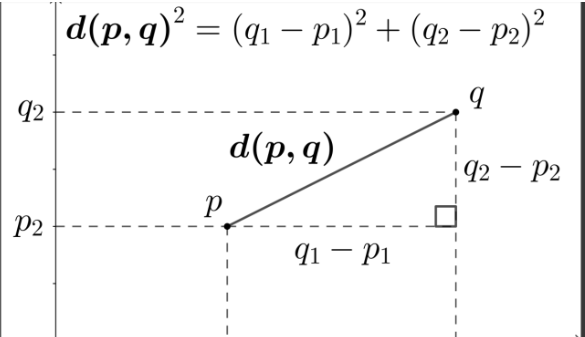

In [ ]:
nome_musica = 'Taylor Swift - Blank Space'

In [ ]:
cluster = projetion_kmeans.filter(projetion_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
cluster

3

In [ ]:
musicas_recomendadas = projetion_kmeans.filter(projetion_kmeans.cluster_pca == cluster)\
                                       .select('artists_song', 'id', 'pca_features')
musicas_recomendadas.show()

+--------------------+--------------------+--------------------+
|        artists_song|                  id|        pca_features|
+--------------------+--------------------+--------------------+
|Usher - Yeah! (fe...|5rb9QrpfcKFHM1EUb...|[-36.050436933493...|
|Kelly Clarkson - ...|3xrn9i8zhNZsTtcoW...|[-35.191226411336...|
| Keyshia Cole - Love|0W4NhJhcqKCqEP2GI...|[-34.751332435196...|
|Mariah Carey - We...|3LmvfNUQtglbTryds...|[-35.144610288312...|
|Korn - Coming Undone|6p2liQLGoDaLXgND6...|[-35.272207170621...|
|Chris Brown - Yo ...|7DFnq8FYhHMCylykf...|[-35.112344117719...|
|  Aventura - Un Beso|1SaEt8dwTuLDzenUu...|[-34.134357732463...|
|Chris Brown - Say...|5F7IJrXD6Fa3EmqoY...|[-34.728839526520...|
|Red Hot Chili Pep...|10Nmj3JCNoMeBQ87u...|[-36.101793760083...|
|Craig Morgan - In...|0Ta3jOf8m9yCSWMVw...|[-35.227552248025...|
|Arctic Monkeys - ...|3geFzA6VBSNZUTmV3...|[-34.696049351615...|
|Arctic Monkeys - 505|58ge6dfP91o9oXMzq...|[-35.057671072817...|
|T-Pain - Buy U a ...|2aI

In [ ]:
componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]
componenetes_musica                             

DenseVector([-35.461, -166.9658, -12.7925, -137.9457, -13.1234, 4.1374])

## Aula 5.2 Recomendação da música

In [ ]:
from scipy.spatial.distance import euclidean
from pyspark.sql.types import FloatType

In [ ]:
def calcula_distance(value):
  return euclidean(componenetes_musica, value)

udf_calcula_distance = f.udf(calcula_distance, FloatType())

musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artists_song', 'id', 'Dist'])

recomendadas.show()

+--------------------+--------------------+-------------------+
|        artists_song|                  id|               Dist|
+--------------------+--------------------+-------------------+
|Taylor Swift - Bl...|1p80LdxRV74UKvL8g...|                0.0|
|Imagine Dragons -...|4uGY9CqDtGtaTTLg1...|0.37921473383903503|
|The All-American ...|6ihL9TjfRjadfEePz...| 0.6039153933525085|
|Darius Rucker - B...|36ISlLb12gKuCCVTY...| 0.6824935674667358|
|Old Dominion - Sn...|7I5fYc4qKJddht8Oz...| 0.7364036440849304|
|Dan + Shay - Noth...|4W38RXuQNuoTSwVsQ...| 0.7841535210609436|
|Twenty One Pilots...|7qxjGHW485TL8ciwk...| 0.8002141118049622|
|Jon Bellion - Mor...|2JXNOtb0ANe6MzgRY...| 0.8098159432411194|
|Kip Moore - More ...|73WWkaWkIRSP3MYGZ...| 0.8557121753692627|
|Calibre 50 - Corr...|0ehx1p1HMn7NMKisZ...| 0.8788507580757141|
+--------------------+--------------------+-------------------+



In [ ]:
def recomendador(nome_musica):
  cluster = projetion_kmeans.filter(projetion_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
  musicas_recomendadas = projetion_kmeans.filter(projetion_kmeans.cluster_pca == cluster)\
                                       .select('artists_song', 'id', 'pca_features')
  componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]

  def calcula_distance(value):
    return euclidean(componenetes_musica, value)

  udf_calcula_distance = f.udf(calcula_distance, FloatType())

  musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

  recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artists_song', 'id', 'Dist'])

  recomendadas.select('artists_song').show(truncate=False)


In [ ]:
recomendador('Taylor Swift - Blank Space')

+-----------------------------------------+
|artists_song                             |
+-----------------------------------------+
|Taylor Swift - Blank Space               |
|Imagine Dragons - Machine                |
|The All-American Rejects - Gives You Hell|
|Darius Rucker - Beers And Sunshine       |
|Old Dominion - Snapback                  |
|Dan + Shay - Nothin' Like You            |
|Twenty One Pilots - Not Today            |
|Jon Bellion - Morning In America         |
|Kip Moore - More Girls Like You          |
|Calibre 50 - Corrido De Juanito          |
+-----------------------------------------+



## Aula 5.3 Biblioteca Spotipy

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials

**ATENÇÃO!**

Antes de rodar essa parte do código, você precisa fazer uma conta na API do Spotify e gerar suas próprias **client_id** e **client_secret**

In [ ]:
scope = "user-library-read playlist-modify-private"

OAuth = SpotifyOAuth(
        scope=scope,         
        redirect_uri='http://localhost:5000/callback',
        client_id = '566b010ba65541ebb537ea12f225fee3',
        client_secret = '0d71d1191ca7418d9af15433c6acfd62')

In [ ]:
client_credentials_manager = SpotifyClientCredentials(client_id = '566b010ba65541ebb537ea12f225fee3',
                                                      client_secret = '0d71d1191ca7418d9af15433c6acfd62')

sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [ ]:
id = projetion_kmeans.filter(projetion_kmeans.artists_song == nome_musica).select('id').collect()[0][0]
id

'1p80LdxRV74UKvL8gnD7ky'

In [ ]:
sp.track(id)

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
    'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
    'id': '06HL4z0CvFAxyc27GXpf02',
    'name': 'Taylor Swift',
    'type': 'artist',
    'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}],
  'available_markets': ['CA', 'US'],
  'external_urls': {'spotify': 'https://open.spotify.com/album/2QJmrSgbdM35R67eoGQo4j'},
  'href': 'https://api.spotify.com/v1/albums/2QJmrSgbdM35R67eoGQo4j',
  'id': '2QJmrSgbdM35R67eoGQo4j',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b2739abdf14e6058bd3903686148',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e029abdf14e6058bd3903686148',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d000048519abdf14e6058bd3903686148',
    'width': 64}],
  'name': '1989',
  'release_date': '2014-10-27',
  'release

In [ ]:
def recomendador(nome_musica):
  # Calcula musicas recomendadas
  cluster = projetion_kmeans.filter(projetion_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
  musicas_recomendadas = projetion_kmeans.filter(projetion_kmeans.cluster_pca == cluster)\
                                       .select('artists_song', 'id', 'pca_features')
  componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]

  def calcula_distance(value):
    return euclidean(componenetes_musica, value)

  udf_calcula_distance = f.udf(calcula_distance, FloatType())

  musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

  recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artists_song', 'id', 'Dist'])

  recomendadas.select('artists_song').show(truncate=False)

  #Pegar informações da API

  playlist_id = recomendadas.select('id').collect()

  playlist_track = []

  for id in playlist_id:
    playlist_track.append(sp.track(id[0]))

  return len(playlist_track)

In [ ]:
recomendador('Taylor Swift - Blank Space')

+-----------------------------------------+
|artists_song                             |
+-----------------------------------------+
|Taylor Swift - Blank Space               |
|Imagine Dragons - Machine                |
|The All-American Rejects - Gives You Hell|
|Darius Rucker - Beers And Sunshine       |
|Old Dominion - Snapback                  |
|Dan + Shay - Nothin' Like You            |
|Twenty One Pilots - Not Today            |
|Jon Bellion - Morning In America         |
|Kip Moore - More Girls Like You          |
|Calibre 50 - Corrido De Juanito          |
+-----------------------------------------+



10

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-track

## Aula 5.3 Imagem do álbum

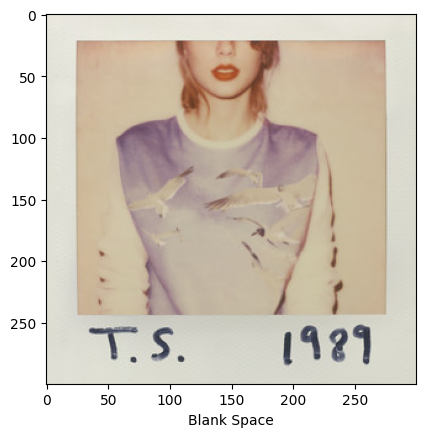

In [ ]:
import matplotlib.pyplot as plt
from skimage import io

nome_musica = 'Taylor Swift - Blank Space'

id = projetion_kmeans\
          .filter(projetion_kmeans.artists_song == nome_musica)\
          .select('id').collect()[0][0]

track = sp.track(id)

url = track["album"]["images"][1]["url"]
name = track["name"]

image = io.imread(url)
plt.imshow(image)
plt.xlabel(name, fontsize = 10)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from skimage import io

def visualize_songs(name,url):

    plt.figure(figsize=(15,10))
    columns = 5
    for i, u in enumerate(url):
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
        image = io.imread(u)
        plt.imshow(image)
        ax.get_yaxis().set_visible(False)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.xlabel(name[i], fontsize = 10)
        plt.tight_layout(h_pad=0.7, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.grid(visible=None)
        #plt.axis('off')
    plt.show()

In [ ]:
playlist_id = recomendadas.select('id').collect()

name = []
url = []
for i in playlist_id:
    track = sp.track(i[0])
    url.append(track["album"]["images"][1]["url"])
    name.append(track["name"])

ReadTimeout: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)

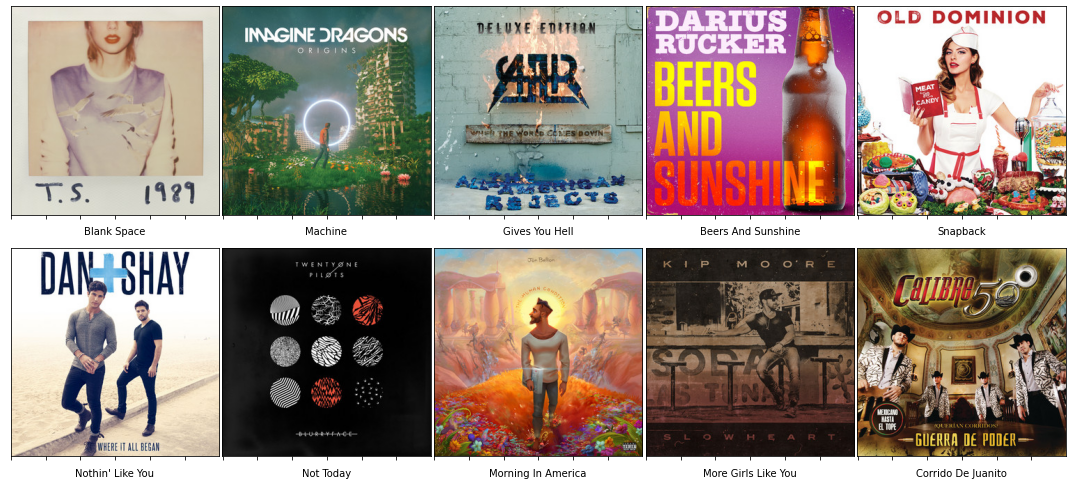

In [ ]:
visualize_songs(name,url)

In [ ]:
def recomendador(nome_musica):
  # Calcula musicas recomendadas
  cluster = projetion_kmeans.filter(projetion_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
  musicas_recomendadas = projetion_kmeans.filter(projetion_kmeans.cluster_pca == cluster)\
                                       .select('artists_song', 'id', 'pca_features')
  componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]

  def calcula_distance(value):
    return euclidean(componenetes_musica, value)

  udf_calcula_distance = f.udf(calcula_distance, FloatType())

  musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

  recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artists_song', 'id', 'Dist'])

  #Pegar informações da API

  playlist_id = recomendadas.select('id').collect()

  name = []
  url = []
  for i in playlist_id:
      track = sp.track(i[0])
      url.append(track["album"]["images"][1]["url"])
      name.append(track["name"])

  #Plotando capas 

  plt.figure(figsize=(15,10))
  columns = 5
  for i, u in enumerate(url):
      ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
      image = io.imread(u)
      plt.imshow(image)
      ax.get_yaxis().set_visible(False)
      plt.xticks(color = 'w', fontsize = 0.1)
      plt.yticks(color = 'w', fontsize = 0.1)
      plt.xlabel(name[i], fontsize = 10)
      plt.tight_layout(h_pad=0.7, w_pad=0)
      plt.subplots_adjust(wspace=None, hspace=None)
      plt.grid(visible=None)
      #plt.axis('off')
  plt.show()

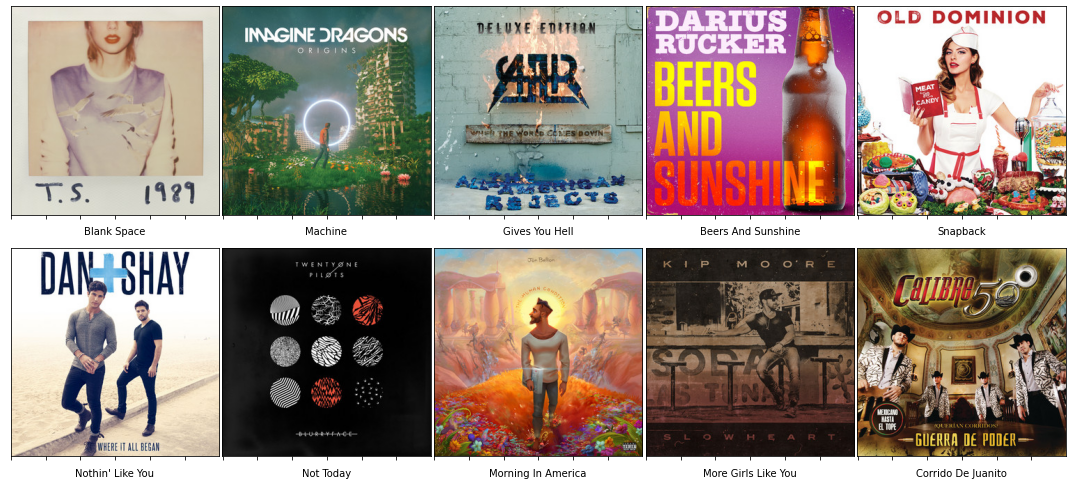

In [ ]:
recomendador('Taylor Swift - Blank Space')

## Aula 5.4 Conclusão